 Part 1: Load and Prepare the Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from io import StringIO


df = pd.read_csv('fb_test.csv')
data = df[['Open']].values


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)


window_size = 10
X, y = create_sequences(scaled_data, window_size)
X = X.reshape((X.shape[0], X.shape[1], 1))


Part 2: LSTM Model Training

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


model = Sequential([
    LSTM(50, activation='relu', input_shape=(X.shape[1], 1)),
    Dense(1)
])


model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X, y, epochs=100, verbose=0)


print("Model trained successfully.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model trained successfully.


 Part 3: Forecasting and Visualization

<ipython-input-3-115b1a53d1e4>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actual = list(map(float, y))  # convert all to float
<ipython-input-3-115b1a53d1e4>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted = list(map(float, y[:-1])) + [float(predicted_price)]  # flatten and ensure float


Length of actual: 10, Length of predicted: 10


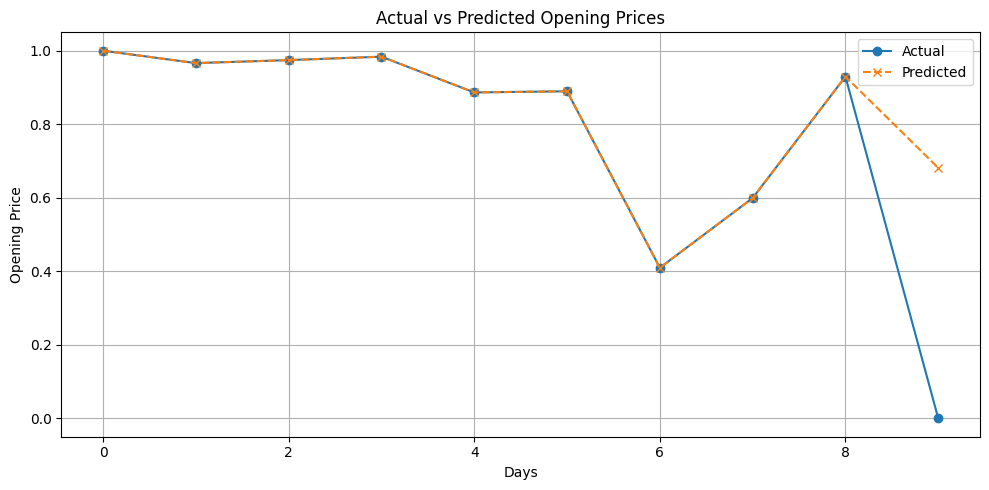

Predicted next opening price: 0.68


In [3]:
import matplotlib.pyplot as plt


last_sequence = X[-1].reshape(1, X.shape[1], 1)
predicted_price = model.predict(last_sequence, verbose=0)[0][0]


actual = list(map(float, y))  # convert all to float
predicted = list(map(float, y[:-1])) + [float(predicted_price)]  # flatten and ensure float


print(f"Length of actual: {len(actual)}, Length of predicted: {len(predicted)}")


plt.figure(figsize=(10, 5))
plt.plot(range(len(actual)), actual, label='Actual', marker='o')
plt.plot(range(len(predicted)), predicted, label='Predicted', linestyle='--', marker='x')
plt.title('Actual vs Predicted Opening Prices')
plt.xlabel('Days')
plt.ylabel('Opening Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


print(f"Predicted next opening price: {predicted_price:.2f}")


Part 4: Evaluation Metrics and Conclusion

Index(['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Target'], dtype='object')
Mean Squared Error: 901.705596235591
Mean Absolute Error: 26.930609306277358
R-squared: -0.3759493727316827


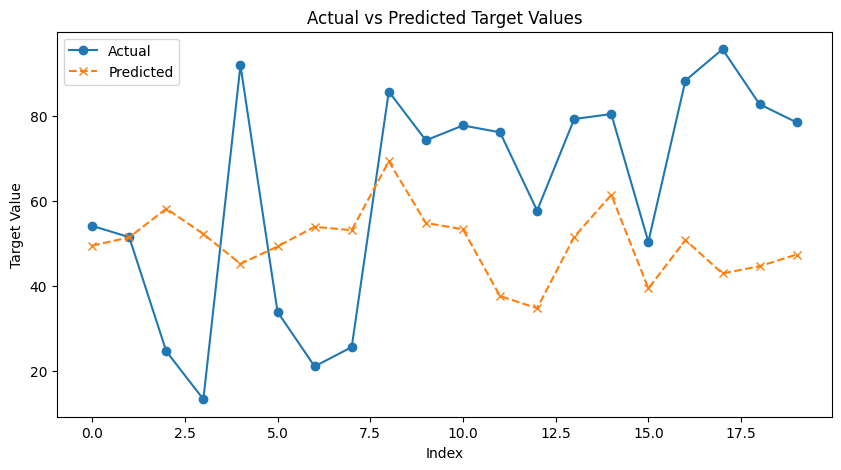

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt



data = {
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Feature3': np.random.rand(100),
    'Feature4': np.random.rand(100),
    'Feature5': np.random.rand(100),
    'Target': np.random.rand(100) * 100
}


df = pd.DataFrame(data)


print(df.columns)


X = df.drop('Target', axis=1)
y = df['Target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


actual = np.array(y_test)
predicted = np.array(y_pred)


plt.figure(figsize=(10, 5))
plt.plot(actual, label='Actual', marker='o')
plt.plot(predicted, label='Predicted', linestyle='--', marker='x')
plt.title('Actual vs Predicted Target Values')
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()


import joblib
joblib.dump(model, 'trained_model.pkl')

model = joblib.load('trained_model.pkl')

